## Download Libraries

In [4]:
#pip install spacy

In [7]:
#! spacy download en_core_web_sm

In [15]:
# it's more general which privdes more detailed tags
import nltk
#nltk.download('universal_tagset')
# VERB — verbs (all tenses and modes)
# NOUN — nouns (common and proper)
# PRON — pronouns
# ADJ — adjectives
# ADV — adverbs
# ADP — adpositions (prepositions and postpositions)
# CONJ — conjunctions
# DET — determiners
# NUM — cardinal numbers
# PRT — particles or other function words

In [9]:
import networkx as nx
import spacy
from spacy import displacy
import matplotlib.pyplot as plt
from nltk.tokenize import TreebankWordTokenizer as twt

## pipline POS represented by network graph

In [10]:
def pos_NetworkX(text):
    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Perform POS tagging
    pos_tagged = [(word, pos) for word, pos in nltk.pos_tag(tokens,tagset = "universal") if pos != '.']

    # Create graph from POS tags
    G = nx.Graph()
    G.add_edges_from(pos_tagged)

    # Print graph info
    print(f"Number of nodes: {len(G.nodes)}")
    print(f"Number of edges: {len(G.edges)}")
    print(f"Edge list: {list(G.edges)}")
    for i in range(len(pos_tagged)):
     for j in range(i+1, len(pos_tagged)):
        if pos_tagged[i][0] != pos_tagged[j][0]:
            if i == j-1 or i == j-2:
                G.add_edge(pos_tagged[i][1], pos_tagged[j][1])
    # Draw graph
    # Draw graph
    nx.draw(G, with_labels=True)

    # Show plot
    plt.show()


## syntactic dependencies

In [11]:
text = "The quick brown fox jumps over the lazy dog. The quick brown fox jumps over the lazy dog again."
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.render(doc, style = "dep")

## visualize POS tags with NLTK and SpaCy

In [12]:
def visualize_pos(text):
    pos_tags = ["PRON", "VERB", "NOUN", "ADJ", "ADP",
                "ADV", "CONJ", "DET", "NUM", "PRT"]
    
    # Tokenize text and pos tag each token
    tokens = twt().tokenize(text)
    tags = nltk.pos_tag(tokens, tagset = "universal")

    # Get start and end index (span) for each token
    span_generator = twt().span_tokenize(text)
    spans = [span for span in span_generator]

    # Create dictionary with start index, end index, 
    # pos_tag for each token
    ents = []
    for tag, span in zip(tags, spans):
        if tag[1] in pos_tags:
            ents.append({"start" : span[0], 
                         "end" : span[1], 
                         "label" : tag[1] })

    doc = {"text" : text, "ents" : ents}

    colors = {"PRON": "blueviolet",
              "VERB": "lightpink",
              "NOUN": "turquoise",
              "ADJ" : "lime",
              "ADP" : "khaki",
              "ADV" : "orange",
              "CONJ" : "cornflowerblue",
              "DET" : "forestgreen",
              "NUM" : "salmon",
              "PRT" : "yellow"}
    
    options = {"ents" : pos_tags, "colors" : colors}
    
    displacy.render(doc, 
                    style = "ent", 
                    options = options, 
                    manual = True,
                   )

In [13]:
visualize_pos("It was a bright cold day in April, and the clocks were striking thirteen")

Number of nodes: 21
Number of edges: 14
Edge list: [('It', 'PRON'), ('was', 'VERB'), ('VERB', 'were'), ('VERB', 'striking'), ('a', 'DET'), ('DET', 'the'), ('bright', 'ADJ'), ('ADJ', 'cold'), ('day', 'NOUN'), ('NOUN', 'April'), ('NOUN', 'clocks'), ('NOUN', 'thirteen'), ('in', 'ADP'), ('and', 'CONJ')]


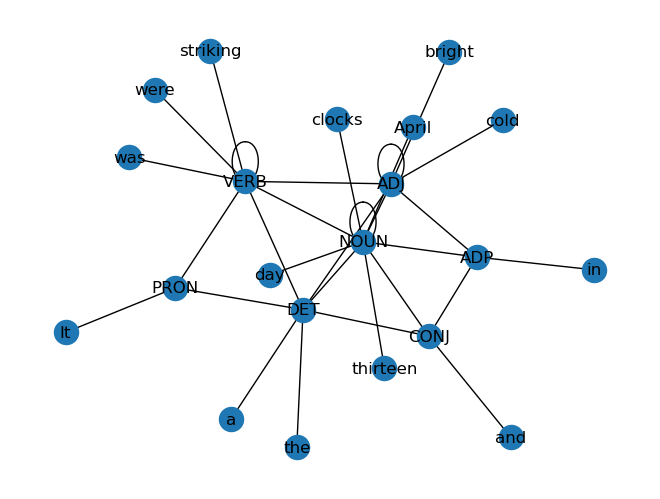

In [14]:
pos_NetworkX("It was a bright cold day in April, and the clocks were striking thirteen")